In [1]:
import math
import time
from sympy import symbols, Poly
import matplotlib.pyplot as plt

## The AKS algorithm for primality testing
### Thanks to Benedict Schülter for sharing an implementation of the algorithm


### Here is the trivial algorithm

In [2]:
def trivial(n):
    if n == 2:
        return True
    for i in range(2, math.floor(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

### Fast exponentiation in truncated polynomials

In [8]:


def poly_mult_mod(poly1, poly2, r, k):
    """
    Multiply two polynomials and take the result modulo x^r - 1 with coefficients reduced modulo k.
    """
    x = symbols('x')
    result = Poly(poly1, x) * Poly(poly2, x)
    result = result % Poly(x**r - 1, x)
    result = Poly([coeff % k for coeff in result.all_coeffs()], x)
    return result

def fast_exp_mod(poly_base, exp, r, k):
    """
    Compute poly_base^exp in the ring of polynomials quotiented by x^r - 1 with coefficients in integers modulo k.
    """
    x = symbols('x')
    result = Poly(1, x)
    base = Poly(poly_base, x)
    
    while exp > 0:
        if exp % 2 == 1:
            result = poly_mult_mod(result, base, r, k)
        base = poly_mult_mod(base, base, r, k)
        exp //= 2
        
    return result

In [4]:
x=symbols("x")
A=Poly(x**45-x-2,x)
B=Poly(x**13-x-5,x)
print(poly_mult_mod(A,B,5,7))
A*B

Poly(6*x**4 + 6*x**3 + x**2 + 6*x + 5, x, domain='ZZ')


Poly(x**58 - x**46 - 5*x**45 - x**14 - 2*x**13 + x**2 + 7*x + 10, x, domain='ZZ')

In [5]:
fast_exp_mod(A,50999987788768687868687600001,17,5)

Poly(3*x**16 + 2*x**15 + 2*x**14 + x**13 + x**12 + 3*x**11 + x**10 + 4*x**9 + 3*x**8 + 4*x**7 + 2*x**6 + 3*x**5 + 2*x**4 + 2*x**3 + x + 4, x, domain='ZZ')

## The function Phi

In [6]:
def phi(n):
    amount = 0
    for k in range(1, n ):
        if math.gcd(k, n) == 1:
            amount += 1
    return amount

### Step 1: Check if n is a perfect power

In [7]:

def ispower(n):
    for b in range(2, math.floor(math.log2(n) + 2)):
        a = int(n ** (1 / b))
        if a**b==n or (a+1)**b==n:
            return True
    return False

In [8]:
ispower(3**11)

True

### Step 2: Find a good r

In [9]:
def find_r(n):
    mk = math.floor(math.log2(n) ** 2)
    nexr = True
    r = 1
    while nexr:
        r += 1
        nexr = False
        if math.gcd(r,n)!=1:
            nexr=True
        k = 0
        while k <= mk and not nexr:
            k = k + 1
            if pow(n, k, r) in (0, 1):
                nexr = True
    return r

In [10]:
n=9385098039580921898797668876

In [11]:
math.gcd(find_r(n),n)

1

In [12]:
size=math.log2(n)

In [13]:
r=find_r(n)

In [15]:
r>size

True

In [17]:
for i in range(1,int(size)):
    if (n**i)%r==1:
        print("error")

### Step 3: Check that 1<a<min(n,r) is prime with n

In [18]:
def check_up_to_min(n, r):
    smaller=min(n,r)
    for a in range(2, smaller):
        if 1 < math.gcd(a, n):
            return False
    return True

### Step4: Check polynomial identities

In [19]:
def check_identities(n,r):
    x=symbols("x")
    ans=True
    upper=int(math.sqrt(phi(r))*math.log(n,2))+1
    for a in range(2,upper):
        if fast_exp_mod(Poly(x+a,x), n, r, n)!=Poly(x**(n%r)+a):
            ans=False
            break
    return ans


### MyAKS

In [20]:
def myaks(n):
    if ispower(n):
        return False
    else:
        r=find_r(n)
        if not check_up_to_min(n,r):
            return False
        if n<=r:
            return True
        return check_identities(n,r)
    


In [21]:
for i in range(2,140):
    if myaks(i)!=trivial(i):
        print("what the hell")

In [23]:
myaks(34503948145346456465643453553554632341)

False

In [36]:
P=1000000007

In [40]:
aks(100)

False

In [24]:
def check_in_range(a,b):
    count=0
    for i in range(a,b):
        if myaks(i)!=trivial(i):
            count=+1
    return count

In [25]:
check_in_range(600,650)

0

In [27]:
q=244565613454353455
myaks(q)==trivial(q)

True

### Comparre running times

In [28]:
def compute_times_trivial(a,b):
    ans=[]
    for i in range(a,b):
        start=time.time()
        trivial(i)
        end=time.time()
        duration=end-start
        ans.append(duration)
    return ans

In [29]:
def compute_times_myaks(a,b):
    ans=[]
    for i in range(a,b):
        start=time.time()
        myaks(i)
        end=time.time()
        duration=end-start
        ans.append(duration)
    return ans

In [30]:
compute_times_myaks(2,100)

[1.3113021850585938e-05,
 6.198883056640625e-06,
 7.152557373046875e-07,
 8.344650268554688e-06,
 2.86102294921875e-06,
 5.0067901611328125e-06,
 1.1920928955078125e-06,
 9.5367431640625e-07,
 5.0067901611328125e-06,
 7.867813110351562e-06,
 6.198883056640625e-06,
 9.059906005859375e-06,
 5.7220458984375e-06,
 8.344650268554688e-06,
 0.0,
 1.4066696166992188e-05,
 1.0013580322265625e-05,
 1.5020370483398438e-05,
 1.0967254638671875e-05,
 1.0013580322265625e-05,
 1.7881393432617188e-05,
 4.00543212890625e-05,
 1.4066696166992188e-05,
 0.0,
 1.1920928955078125e-05,
 0.0,
 2.6941299438476562e-05,
 3.504753112792969e-05,
 1.71661376953125e-05,
 0.04667186737060547,
 5.7220458984375e-06,
 3.504753112792969e-05,
 1.9073486328125e-05,
 1.9073486328125e-05,
 9.5367431640625e-07,
 6.699562072753906e-05,
 3.0994415283203125e-05,
 2.4080276489257812e-05,
 3.1948089599609375e-05,
 4.1961669921875e-05,
 2.4080276489257812e-05,
 4.291534423828125e-05,
 2.9087066650390625e-05,
 2.6941299438476562e-05

In [31]:

def plot_execution_times(a,b):
    y = compute_times_trivial(a,b)
    x = range(a,b)

    # Plot the curve
    plt.plot(x, y,color='red', label='trivial')
    Y = compute_times_myaks(a,b)
    X = range(a,b)

    # Plot the curve
    plt.plot(X, Y,color='green', label='AKS')
    # Add title and labels
    plt.title("Execution time for AKS and trivial algorithms")
    plt.xlabel("N")
    plt.ylabel("Time in seconds")
    plt.legend()
    plt.xlim(a,b)

    # Display the plot
    plt.show()


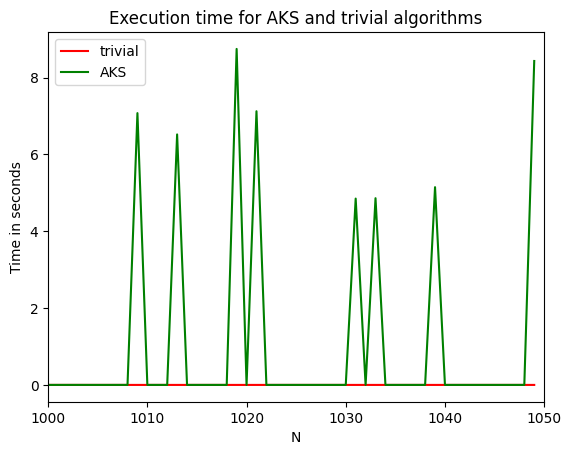

In [32]:
A=1000
B=A+50
plot_execution_times(A,B)